Exploration of dataset with football players in FIFA18 
=========================================
## [FIFA 18 Complete Player Dataset](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset)
The dataset is comprised of features about the footballers in the game, like: accelaration, shot power, salary, league, nationality and so on.

The purpose of this notebook will be to **predict the overall rating of a player** based on his individual skills, position and league.



In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [79]:
fifa_df = pd.read_csv('data/fifa/fifa.csv')

In [81]:
fifa_df.shape

(17994, 184)

In [82]:
pd.set_option('display.max_columns', None)
fifa_df.describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,1.799400e+04,17994.000000,1.650000e+04,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,207791.796543,1594.417306,25.120151,181.271980,75.400856,2.370511e+06,11503.834612,4.449111e+06,66.253029,71.200400,67.739969,53.485217,57.531177,62.591308,49.404301,64.767033,1.122374,2.318273,2.948927,49.806046,45.330388,52.379293,58.338891,43.225797,55.113538,47.327554,43.165777,52.478937,58.139880,64.647827,64.887240,63.347838,61.897021,63.807491,55.672391,64.885351,63.297766,65.289541,47.238691,55.828109,46.575247,49.681060,53.030788,48.989163,57.886684,44.124986,47.478937,45.592086,16.698844,16.479049,16.356952,16.470935,16.833889,58.216115,59.375634,59.042384,59.262819,58.515244,60.073249,56.871220,55.553747,56.990985,57.710574,58.216115,59.375634,59.042384,59.262819,58.515244,60.073249,56.871220,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,32328.527723,271.587232,4.617428,6.690392,6.994824,5.347250e+06,23050.661073,1.055955e+07,6.946729,6.082015,10.937646,13.833779,10.466810,10.377375,17.120189,9.657583,0.403297,0.746032,0.661107,18.436764,19.479680,17.395498,14.867599,17.730451,18.953630,18.451613,17.570869,15.490338,16.750302,14.880575,14.603506,14.755063,9.139441,14.093398,17.379212,11.878768,15.875790,12.628182,19.267705,17.455601,20.684196,19.413951,14.358107,15.802867,12.905050,21.582512,21.819514,21.477372,17.754770,16.980634,16.576425,17.088585,18.049797,9.162295,9.946061,9.898161,9.845668,8.844482,9.312083,10.285525,12.183008,9.773546,9.119380,9.162295,9.946061,9.898161,9.845668,8.844482,9.312083,10.285525,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,728.000000,16.000000,155.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,46.000000,46.000000,21.000000,14.000000,24.000000,24.000000,12.000000,27.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,10.000000,4.000000,2.000000,6.000000,4.000000,7.000000,8.000000,11.000000,11.000000,14.000000,28.000000,11.000000,3.000000,13.000000,12.000000,12.000000,3.000000,11.000000,4.000000,2.000000,10.000000,5.000000,5.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,26.000000,27.000000,27.000000,30.000000,28.000000,26.000000,25.000000,30.000000,31.000000,31.000000,26.000000,27.000000,27.000000,30.000000,28.000000,26.000000,25.000000,30.000000,31.000000

#### Viewing columns with their types

In [3]:
pd.set_option('display.max_rows', None)
columns = [(x, fifa_df[x].dtype) for x in fifa_df.columns]
pd.DataFrame(columns=['Feature', 'Type'], data=columns)

,Feature,Type
0,ID,int64
1,name,object
2,full_name,object
3,club,object
4,club_logo,object
5,special,int64
6,age,int64
7,league,object
8,birth_date,object
9,height_cm,float64


### Finding features that must be encoded or deleted

In [4]:
[x for x in fifa_df.columns if fifa_df[x].dtype == 'object']

['name',
 'full_name',
 'club',
 'club_logo',
 'league',
 'birth_date',
 'body_type',
 'flag',
 'photo',
 'work_rate_att',
 'work_rate_def',
 'preferred_foot']

## Encoding and deleting features
First I will explore the 'league' feature

#### Players in each leagues:

In [5]:
fifa_df.league.value_counts()

Argentinian Superliga            780
English Championship             717
English League One               668
English Premier League           654
Spanish Segunda División         637
English League Two               633
Italian Serie B                  625
USA Major League Soccer          625
Spanish Primera División         602
French Ligue 1                   598
Italian Serie A                  559
Colombian Primera A              552
French Ligue 2                   543
German Bundesliga                537
Japanese J1 League               519
Mexican Liga MX                  518
German 3. Liga                   515
German 2. Bundesliga             510
Portuguese Primeira Liga         509
Turkish Süper Lig                502
Holland Eredivisie               488
Russian Premier League           449
Belgian First Division A         436
Polish Ekstraklasa               418
Saudi Professional League        411
Norwegian Eliteserien            393
Swedish Allsvenskan              389
D

#### Top leagues by number of footballers in them

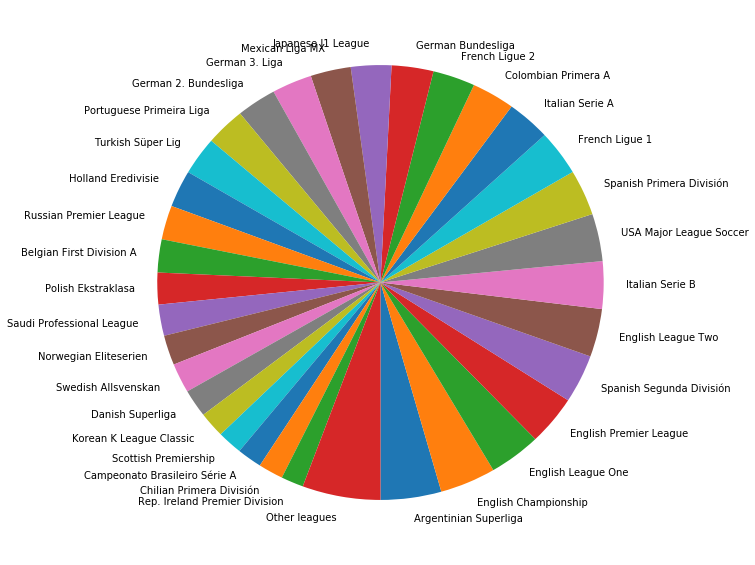

In [6]:
top_n_leagues=33
top_leagues = fifa_df.league.value_counts()[:top_n_leagues]
top_leagues = top_leagues.append(pd.Series({'Other leagues': sum(fifa_df.league.value_counts()[top_n_leagues:])}))
plt.figure(figsize=(10,10))
plt.pie(x=top_leagues, labels=top_leagues.index, labeldistance=1.1, startangle=-90);

#### Players with no league

In [83]:
fifa_df[pd.isna(fifa_df.league)].describe()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.0,253.0,0.0,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,38.000000
mean,210243.351779,1581.877470,27.335968,180.853755,75.664032,0.0,0.0,NaN,67.367589,70.003953,68.569170,53.806324,58.237154,62.189723,51.628458,64.628458,1.110672,2.276680,3.011858,49.387352,43.474308,52.280632,56.158103,41.948617,52.727273,45.106719,42.268775,51.739130,54.889328,64.849802,64.332016,60.837945,62.652174,64.162055,52.909091,62.905138,62.438735,63.517787,45.454545,54.521739,47.466403,48.347826,52.478261,49.292490,55.387352,46.083004,48.450593,46.505929,19.150198,18.727273,18.786561,18.972332,19.055336,57.906977,58.967442,58.544186,58.688372,58.409302,59.883721,57.795349,57.013953,58.400000,58.809302,57.906977,58.967442,58.544186,58.688372,58.409302,59.883721,57.795349,57.013953,58.400000,58.809302,57.906977,58.544186,58.688372,58.409302,57.795349,57.013953,67.473684
std,24902.735804,278.599781,4.131011,6.525770,7.062769,0.0,0.0,NaN,5.824420,5.816983,8.842996,15.562153,11.430565,10.986083,16.492311,9.090173,0.382666,0.762807,0.726386,19.965053,21.334550,19.189228,16.984783,18.837477,20.083574,19.442642,18.342392,17.150684,18.582816,13.863606,13.749475,14.780719,8.407619,13.114931,20.056162,10.365488,16.279101,13.952750,20.917139,18.065262,20.506577,20.691363,16.005348,17.683994,14.783898,22.853333,22.174867,22.125655,20.807345,20.156548,19.997071,20.456963,21.331587,9.876371,10.571689,10.761069,10.812359,9.452780,9.893379,9.594341,11.493793,9.123657,8.572173,9.876371,10.571689,10.761069,10.812359,9.452780,9.893379,9.594341,11.493793,9.123657,8.572173,9.876371,10.761069,10.812359,9.452780,9.594341,11.493793,5.520169
min,113045.000000,909.000000,19.000000,160.000000,55.000000,0.0,0.0,NaN,52.000000,53.000000,30.000000,21.000000,27.000000,30.000000,19.000000,35.000000,1.000000,1.000000,1.000000,10.000000,5.000000,6.000000,14.000000,4.000000,7.000000,10.000000,10.000000,12.000000,11.000000,15.000000,19.000000,21.000000,33.000000,21.000000,11.000000,32.000000,18.000000,21.000000,5.000000,17.000000,6.000000,4.000000,12.000000,11.000000,13.000000,5.000000,10.000000,9.000000,4.000000,4.000000,4.000000,4.000000,4.000000,36.000000,31.000000,32.000000,30.000000,34.000000,34.000000,32.000000,29.000000,32.000000,34.000000,36.000000,31.000000,32.000000,30.000000,34.000000,34.000000,32.000000,29.000000,32.000000,34.000000,36.000000,32.000000,30.000000,34.000000,32.000000,29.000000,52.000000
25%,193869.000000,1444.000000,24.000000,176.000000,71.000000,0.0,0.0,NaN,64.000000,67.000000,64.000000,40.000000,52.000000,57.000000,38.000000,59.000000,1.000000,2.00

Filling Nan values for players without a league

In [8]:
fifa_df.league.fillna('Free agent', inplace=True)

#### One-hot encoding leagues
Label binarizer needs numerical data so we must encode league names to numbers

In [9]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

*encode_league* uses list of leagues to encode each league by its index

In [10]:
leagues = list(set(fifa_df.league))
def encode_league(series_league):
    return series_league.apply(lambda x: leagues.index(x))

encoded_leagues = encode_league(fifa_df.league)

Label Binarizer creates a dataframe with a column for each league, when we transform the series

In [11]:
lb.fit(encoded_leagues)
leagues_df = pd.DataFrame(lb.transform(encoded_leagues), columns=leagues)

Concatenating the dataframe with leagues to main dataframe

In [12]:
fifa_df = pd.concat([fifa_df, leagues_df], axis=1)

#### Exploring features: work\_rate\_(att|def) and preffered_foot

In [13]:
att_values = fifa_df.work_rate_att.value_counts()
def_values = fifa_df.work_rate_def.value_counts()
foot_values = fifa_df.preferred_foot.value_counts()
print(pd.DataFrame(att_values))
print(pd.DataFrame(def_values))
print(pd.DataFrame(foot_values))

        work_rate_att
Medium          12447
High             4645
Low               902
        work_rate_def
Medium          13560
High             2860
Low              1574
       preferred_foot
Right           13743
Left             4251


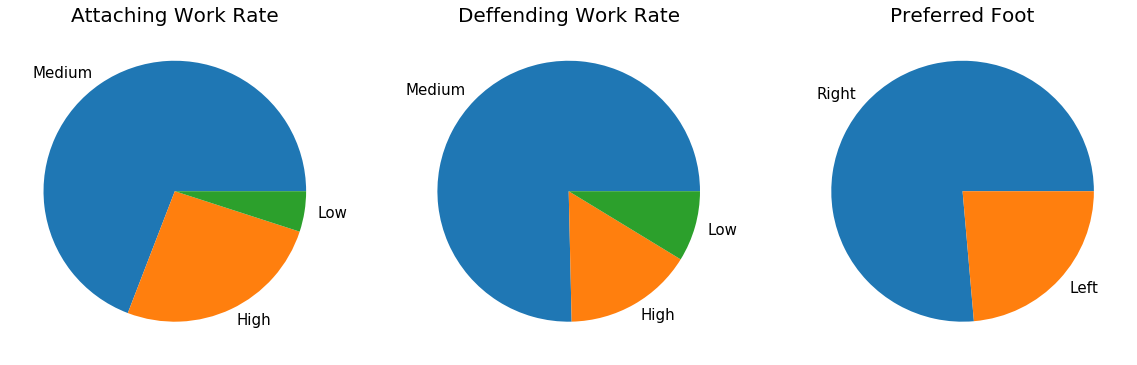

In [87]:
def create_pie_subplot(ax, values, title):
    ax.set_title(title, fontdict={'fontsize': 20})
    
    _, texts = ax.pie(x=values, labels=values.index);
    
    for t in texts:
        t.set_fontsize(15)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

create_pie_subplot(axes[0], att_values, 'Attaching Work Rate')
create_pie_subplot(axes[1], def_values, 'Deffending Work Rate')
create_pie_subplot(axes[2], foot_values, 'Preferred Foot')

Encoding work_rates (no need to onehot encode them because they are incremental data)

In [15]:
fifa_df['work_rate_att_encoded'] = fifa_df.loc[:,'work_rate_att'].apply(lambda x: ['Low', 'Medium', 'High'].index(x))
fifa_df['work_rate_def_encoded'] = fifa_df.loc[:,'work_rate_def'].apply(lambda x: ['Low', 'Medium', 'High'].index(x))

Encoding preffered_foot with comparisson because it be only left or right

In [16]:
fifa_df['preferred_foot_encoded'] = (fifa_df.preferred_foot == 'Right').astype('float')

#### Remove features that can't give us much information

In [17]:
pd.set_option('display.max_rows', 10)
fifa_df[['ID','name', 'full_name', 'club_logo', 'real_face', 'flag', 'photo']]

,ID,name,full_name,club_logo,real_face,flag,photo
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/24/18/teams/243.png,True,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/48/18/players/20801.png
1,158023,L. Messi,Lionel Messi,https://cdn.sofifa.org/24/18/teams/241.png,True,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/48/18/players/158023.png
2,190871,Neymar,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/24/18/teams/73.png,True,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/48/18/players/190871.png
3,176580,L. Suárez,Luis Suárez,https://cdn.sofifa.org/24/18/teams/241.png,True,https://cdn.sofifa.org/flags/60.png,https://cdn.sofifa.org/48/18/players/176580.png
4,167495,M. Neuer,Manuel Neuer,https://cdn.sofifa.org/24/18/teams/21.png,True,https://cdn.sofifa.org/flags/21.png,https://cdn.sofifa.org/48/18/players/167495.png
...,...,...,...,...,...,...,...
17989,237463,A. Kelsey,Adam Kelsey,https://cdn.sofifa.org/24/18/teams/1949.png,False,https://cdn.sofifa.org/flags/14.png,https://cdn.sofifa.org/48/18/players/237463.png
17990,11728,B. Richardson,Barry Richardson,https://cdn.sofifa.org/24/18/teams/1933.png,False,https://cdn.sofifa.org/flags/14.png,https://cdn.sofifa.org/48/18/players/11728.png
17991,231381,J. Young,Jordan Young,https://cdn.sofifa.org/24/18/teams/1934.png,False,https://cdn.sofifa.org/flags/42.png,https://cdn.sofifa.org/48/18/players/231381.png
17992,238813,J. Lundstram,Josh Lundstram,https://cdn.sofifa.org/24/18/teams/121.png,False,https://cdn.sofifa.org/flags/14.png,https://cdn.sofifa.org/48/18/players/238813.png


In [18]:
fifa_df = fifa_df.drop(['ID','name', 'full_name', 'club_logo', 'real_face', 'flag', 'photo'], axis=1)

### Exploring player position on the pitch

Extracting all possible positions

In [19]:
columns = list(fifa_df.columns)
positions = columns[columns.index('rs'):columns.index('gk')]
positions

['rs',
 'rw',
 'rf',
 'ram',
 'rcm',
 'rm',
 'rdm',
 'rcb',
 'rb',
 'rwb',
 'st',
 'lw',
 'cf',
 'cam',
 'cm',
 'lm',
 'cdm',
 'cb',
 'lb',
 'lwb',
 'ls',
 'lf',
 'lam',
 'lcm',
 'ldm',
 'lcb']

Visualizing th positions 

prefers_rs        0
prefers_rw      817
prefers_rf        0
prefers_ram       0
prefers_rcm       0
prefers_rm     2551
prefers_rdm       0
prefers_rcb       0
prefers_rb     2049
prefers_rwb     198
prefers_st     3230
prefers_lw      808
prefers_cf      351
prefers_cam    2290
prefers_cm     3606
prefers_lm     2567
prefers_cdm    2672
prefers_cb     3640
prefers_lb     2063
prefers_lwb     198
prefers_ls        0
prefers_lf        0
prefers_lam       0
prefers_lcm       0
prefers_ldm       0
prefers_lcb       0
dtype: int64

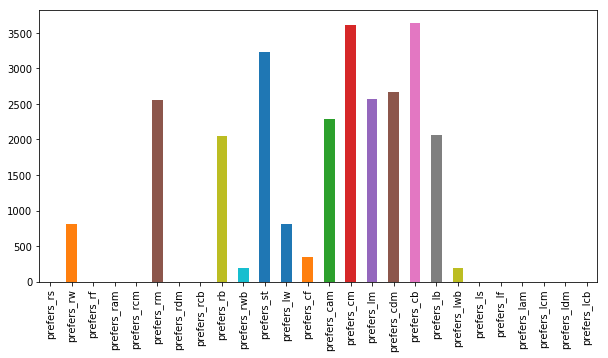

In [20]:
pd.set_option('display.max_rows', 30)
pref_pos = ['prefers_' + x for x in positions]
positions_counts = fifa_df[pref_pos].sum()

plt.figure(figsize=(10,5))
positions_counts.plot.bar();
positions_counts 

Add feature for the number of positions a player prefers

In [21]:
fifa_df['positions'] = fifa_df[pref_pos].sum(axis=1)

Dropping columns with the positions that no player preffers, because they don't give any information

In [22]:
fifa_df = fifa_df.drop(positions_counts[positions_counts == 0].index, axis=1)

#### Exploring body_type feature

In [23]:
grouped_by_bt = fifa_df.groupby(['body_type'])['phy']
body_type_stats = pd.DataFrame([grouped_by_bt.mean(), grouped_by_bt.count()], index=['mean', 'count'])
body_type_stats.T.sort_values(by='mean', ascending=False)

,mean,count
body_type,,
Courtois,86.000000,1.0
Akinfenwa,80.000000,1.0
C. Ronaldo,80.000000,1.0
Stocky,69.769748,1190.0
Normal,65.912440,10587.0
Shaqiri,65.000000,1.0
Lean,61.849139,6211.0
Messi,61.000000,1.0
Neymar,60.000000,1.0


To reduce the unique body_types to the more common ones, we compare them by physical strength a.k.a. 'phy'.

In [24]:
replace_dict = {'Courtois': 'Stocky', 'Akinfenwa': 'Stocky', 
                'C. Ronaldo':'Stocky', 'Shaqiri':'Normal', 
                'Neymar':'Lean','Messi':'Lean'}
fifa_df.body_type.replace(replace_dict, inplace=True)

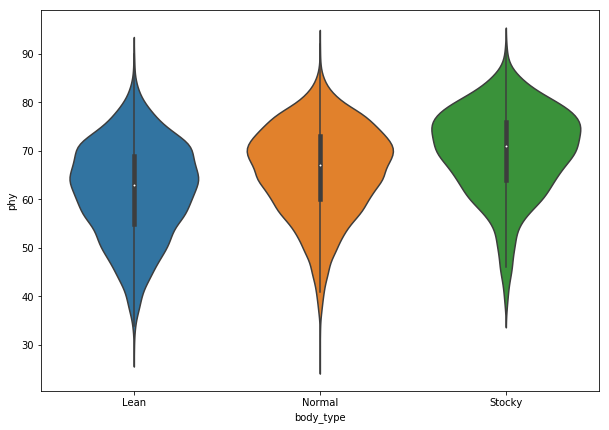

In [25]:
order_bt = ['Lean', 'Normal', 'Stocky']
plt.figure(figsize=(10,7))
sns.violinplot(x='body_type', y='phy', order=order_bt, data=fifa_df);

Because body_type is incemental feature(lean < normal < stocky) it doesn't need to be binarizered, when encoded

In [26]:
fifa_df['body_type_norm'] = fifa_df.body_type.replace({'Lean': 0, 'Normal': 1, 'Stocky': 2})

#### Exploring special feature

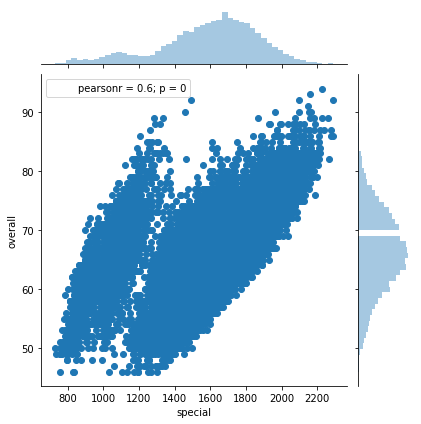

In [27]:
plt.figure(figsize=(10,7))
sns.jointplot(x='special', y='overall', data=fifa_df,);

In [28]:
fifa_df.special.describe()

count    17994.000000
mean      1594.417306
std        271.587232
min        728.000000
25%       1450.250000
50%       1634.000000
75%       1785.000000
max       2291.000000
Name: special, dtype: float64

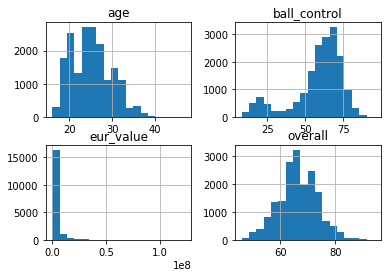

In [29]:
plt.figure(figsize=(14, 8))
fifa_df[['overall', 'age', 'ball_control', 'eur_value']].hist(bins=18);

In [30]:
fifa_df.isnull().sum().sort_values(ascending=False).head(30)

gk                    15973
lf                     2021
lwb                    2021
lb                     2021
lam                    2021
lcm                    2021
ldm                    2021
lcb                    2021
cb                     2021
cdm                    2021
lm                     2021
cm                     2021
cam                    2021
cf                     2021
lw                     2021
st                     2021
rwb                    2021
rb                     2021
rcb                    2021
rdm                    2021
rm                     2021
rcm                    2021
ram                    2021
rf                     2021
rw                     2021
rs                     2021
ls                     2021
eur_release_clause     1494
club                    253
sliding_tackle            0
dtype: int64

There are too much Nan values in features for position. Also we prepared the 'prefered position' features, so these are not needed in the dataframe.

In [31]:
fifa_df.drop(fifa_df.columns.to_series()['rs':'gk'], axis=1, inplace=True)

In [32]:
fifa_df.isnull().sum().sort_values(ascending=False)

eur_release_clause                 1494
club                                253
vision                                0
gk_reflexes                           0
chip_shot_trait                       0
cautious_with_crosses_trait           0
bicycle_kicks_trait                   0
backs_into_player_trait               0
avoids_using_weaker_foot_trait        0
argues_with_officials_trait           0
acrobatic_clearance_trait             0
1_on_1_rush_trait                     0
gk_positioning                        0
penalties                             0
comes_for_crosses_trait               0
                                   ... 
prefers_cam                           0
prefers_cf                            0
prefers_lw                            0
prefers_st                            0
prefers_rwb                           0
prefers_rb                            0
prefers_rm                            0
prefers_rw                            0
clinical_finisher_speciality          0


In [33]:
fifa_df.club.value_counts()

Olympique Lyonnais                  33
FC Nantes                           33
Burnley                             33
Stade Rennais FC                    33
FC Augsburg                         33
Málaga CF                           33
Brighton & Hove Albion              33
Bournemouth                         33
West Ham United                     33
Amiens SC Football                  33
Southampton                         33
OGC Nice                            33
Arsenal                             33
Newcastle United                    33
Swansea City                        33
                                    ..
CD Antofagasta                      20
Clube Atlético Mineiro              20
Santiago Wanderers                  20
Santos Futebol Clube                20
CD Huachipato                       20
Universidad Católica                20
Grêmio Foot-Ball Porto Alegrense    20
Avaí Futebol Clube                  20
San Luis de Quillota                20
Vitória                  

Dropping club because I don't want to overcrowd and pollute the features. Plus we already have the league feature.

In [34]:
fifa_df.drop(['club'], axis=1, inplace=True)

#### Explore 'eur_release_clause'

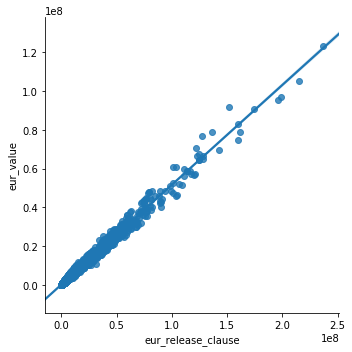

In [35]:
sns.lmplot(x='eur_release_clause', y='eur_value', data=fifa_df)

Release clause and Value are linearly dependent, so we can remove the release clause

In [36]:
fifa_df.drop(['eur_release_clause'], axis=1, inplace=True)

#### Explore correlation between player overall rating, age, potential, value and reputation

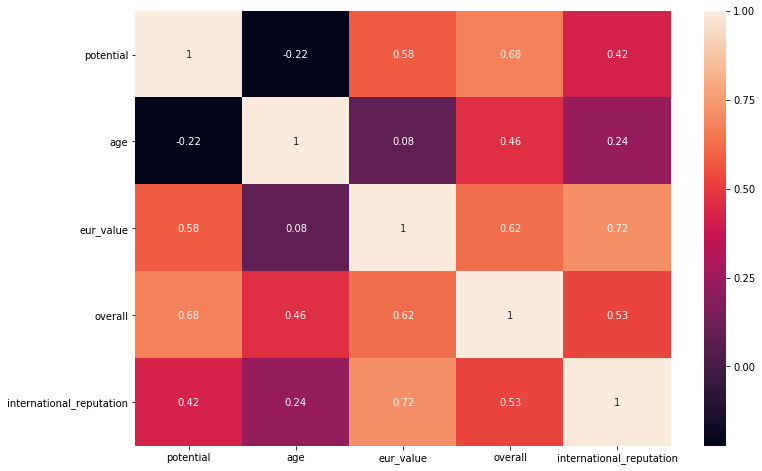

In [37]:
plt.figure(figsize=(12, 8))
correlation_skills = fifa_df[['potential', 'age', 'eur_value', 'overall', 'international_reputation']].corr()
sns.heatmap(correlation_skills, annot=True);

Drop birth date because we already have age

In [38]:
fifa_df.drop(['birth_date'], axis=1, inplace=True)

Remove all the unique special traits because we have the 'special' feature, which represents them

In [39]:
import re
fifa_df.drop([ x for x in fifa_df.columns if re.match(r'.*trait$', x)], axis=1, inplace=True)

Remove league, body_type, work rates and preferred foot because we already encoded them

In [41]:
fifa_df.drop(['league', 'body_type', 'work_rate_att', 'work_rate_def', 'preferred_foot'], axis=1, inplace=True)

## Model selection

In [42]:
from sklearn.model_selection import train_test_split
stats = fifa_df.drop(['overall'], axis=1)
overall = fifa_df.overall

In [43]:
x_train, x_test, y_train, y_test = train_test_split(stats, overall, test_size=0.3, random_state=42)

Choose linear regression as baseline model, because there must be a linear formula forming the overall rating

In [44]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
regressor.score(x_train, y_train), regressor.score(x_test, y_test)

(0.94776652346964341, 0.9472818460657817)

#### Viewing the most prominent features
Taking only the highest coefficents

In [54]:
high_coefs = regressor.coef_[np.abs(regressor.coef_) > 0.5]
cols = x_train.columns[np.abs(regressor.coef_) > 0.5]
print(len(x_train.columns) - len(cols), "/", len(x_train.columns), " prominent features")

94 / 126  prominent features


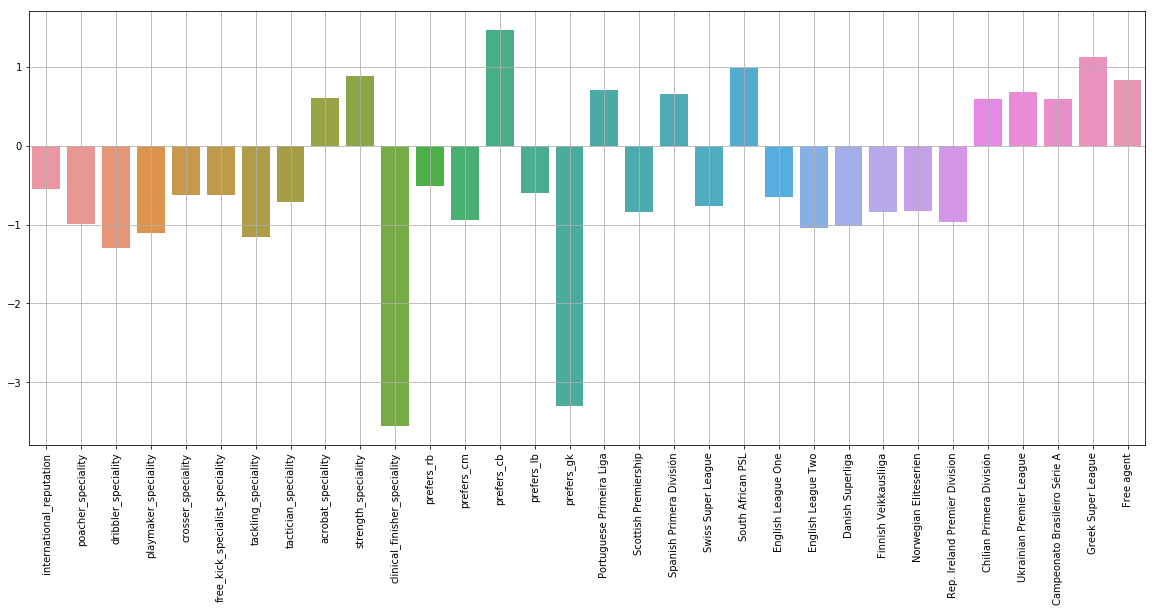

In [56]:
plt.figure(figsize=(20,8))

barplot = sns.barplot(x=cols, y=high_coefs, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90)
plt.grid(True)

Using lasso to remove some features could get better score

In [57]:
from sklearn.linear_model import Lasso

for a in [0.001, 0.01, 0.1, 10, 100, 1000]:
    ls = Lasso(alpha=a)
    ls.fit(x_train, y_train)
    print("alpha = ", a, "train: " ,ls.score(x_train, y_train), "test: ", ls.score(x_test, y_test))

/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha =  0.001 train:  0.947545609637 test:  0.947239437414
alpha =  0.01 train:  0.944138153067 test:  0.94437697519
alpha =  0.1 train:  0.934371299073 test:  0.935900657669
alpha =  10 train:  0.775821296527 test:  0.763614132828
alpha =  100 train:  0.561721774766 test:  0.526103661796
alpha =  1000 train:  0.416041512648 test:  0.374111174855


Not what I expected but trying regularization with Ridge

In [58]:
from sklearn.linear_model import Ridge
Ridge(alpha=0.1).fit(x_train, y_train).score(x_test, y_test)

0.94728025510828529

In [59]:
from sklearn.model_selection import GridSearchCV

grid = {'alpha': [0.005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
search = GridSearchCV(Ridge(), grid)
search.fit(x_train, y_train)
search.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
search.score(x_test, y_test)

0.94725991094880357

Test with elastic net which regularizes with combined L1 and L2

In [61]:
from sklearn.linear_model import ElasticNetCV
el_net = ElasticNetCV(alphas=[1, 0.1, 0.001])

In [62]:
el_net.fit(x_train, y_train)

/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/nbabulkov/.virtualenvs/ai-venv/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=[1, 0.1, 0.001], copy_X=True, cv=None, eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [63]:
el_net.score(x_test, y_test)

0.94709228129110623

Regularizations didn't give better results than LR.

Let's try normal linear regression with polynomial features.

Increased the score greatly using polynomial features

**WARNING**: *VERY* time and CPU consuming!

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
r = make_pipeline(PolynomialFeatures(), LinearRegression())
r.fit(x_train, y_train).score(x_test, y_test)

0.98089496814518895

Can SVM give better results than LR with polynomial features?

In [64]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
p = make_pipeline(StandardScaler(), SVR(C=0.1, kernel='linear'))

**WARNING**: Time-consuming operation!

In [76]:
p.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [ ]:
p.score(x_train, y_train), p.score(x_test, y_test)

Sadly, it can't!

## Conclusion
The linear regression with polynomial features gave the best result.

Neigher L1, nor L2 regularization could give better result, than normal linear regression.

Even SVM couldn't help, even though it was as slow as LR with polynomial features.

**Best score:** 0.98089496814518895